Prediksi Kualitas Udara di Negara Asia Tenggara : Analisis Performa Algoritma KNN dan Naïve 
Bayes 

Muhammad Naffa Rizky Fissabilli - A11.2022.14755

Kehidupan zaman sekarang ini sangat membutuhkan banyak teknologi dan juga sumber daya yang jumlahnya sangat besar sehingga dapat menunjang dan memajukan kehidupan manusia. Perilaku manusia seiring berjalannya waktu akan berubah dan terus berkembang, dengan perilaku dinamis tersebut banyaknya aktivitas manusia membutuhkan teknologi seperti kendaraan yang membantu bergulirnya hiruk-pikuk hidup manusia. Pertambahan populasi manusia yang semakin bertambah dapat mempengaruhi kebutuhan mereka akan teknologi dan sumber daya. Tentunya, teknologi dan sumber daya yang digunakan akan menghasilkan residu yang menyebabkan terpengaruhnya lingkungan. Lingkungan yang juga dibutuhkan manusia untuk bertahan hidup dapat berubah menjadi tercemar terhadap polusi akibat residu yang dihasilkan dari teknologi dan sumber daya yang digunakan. Dengan adanya polusi contohnya polusi udara akan memengaruhi kualitas udara pada negara dan daerah yang mungkin padat penduduk. Maka dari itu dengan dataset "Air Quality Index" saya dapat mengetahui seberapa parah juga nilai dari kualitas udara pada daerah dan negara yang ada.

Tujuan saya melakukan penelitian pada project ini adalah untuk Menyelesaikan Tugas Akhir ini. Saya juga ingin mengetahui prediksi bagaimana kualitas udara di negara-negara pada region Asia Tenggara dengan model KNN dan Naive Bayes juga menganalisis performa kedua algoritma tersebut

Model Yang saya gunakan adalah KNN dan Naive Bayes 

KNN 
K-Nearest Neighbor (KNN) adalah algoritma klasifikasi yang bekerja dengan mengidentifikasi sejumlah K data terdekat (tetangga) dari data baru yang akan diklasifikasikan. Algoritma ini berasumsi bahwa objek yang memiliki kemiripan akan berada dekat satu sama lain dalam ruang fitur. KNN termasuk dalam kategori lazy learning, yang berarti tidak membangun model secara eksplisit, tetapi menggunakan seluruh data pelatihan untuk melakukan klasifikasi.

Cara Kerja
Proses kerja KNN dapat dijelaskan dalam beberapa langkah:
Menentukan Nilai K: Jumlah tetangga (K) yang akan digunakan untuk klasifikasi harus ditentukan. Karena nilai K yang terlalu kecil atau terlalu besar dapat menyebabkan overfitting atau underfitting, pemilihan nilai K sangat penting.
Menghitung Jarak: Ini adalah cara untuk menghitung jarak antara semua data dalam dataset pelatihan dan data baru. Euklidis jarak, jarak Manhattan, dan jarak Minkowski adalah metode penghitungan jarak yang umum digunakan.
Menentukan Tetangga Terdekat: Berdasarkan jarak yang telah dihitung, cari K tetangga terdekat.
Menentukan Kelas Mayoritas: Hitung jumlah setiap kelas dari K tetangga terdekat. Kelas dengan jumlah terbesar akan menjadi kelas untuk data baru tersebut.
Klasifikasi Data Baru: Kelas mayoritas tetangga terdekat digunakan untuk mengkategorikan data baru.

Naive Bayes
Naive Bayes adalah sekumpulan algoritma klasifikasi berbasis probabilitas yang didasarkan pada Teorema Bayes, dengan asumsi independensi antar fitur. Meskipun asumsi ini sering kali tidak realistis, Naive Bayes terbukti efektif dalam banyak aplikasi praktis, terutama dalam pengklasifikasian teks seperti analisis sentimen dan spam filtering.

Cara Kerja
Proses kerja Naive Bayes terdiri dari:
Menghitung Probabilitas Prior: Berdasarkan frekuensi relatif kelas dalam dataset pelatihan, Anda akan menemukan probabilitas awal untuk setiap kelas.
Menghitung Probabilitas Likelihood: Hitung kemungkinan bahwa setiap fitur akan muncul di setiap kelas. Menghitung Probabilitas Posterior: Gunakan Teorema Bayes untuk menghitung kemungkinan posterior untuk setiap kelas, dengan mengalikan kemungkinan prior dengan kemungkinan kemungkinan dari fitur yang ada.
Klasifikasi Data Baru: Kelas probabilitas posterior tertinggi akan digunakan untuk mengkategorikan data baru.





+---------------------+
|  Pengumpulan Data   |
+---------------------+
           |
           v
+---------------------+
|  Preprocessing Data  |
+---------------------+
           |
           v
+---------------------+
|   Pembuatan Model   |
+---------------------+
           |
           v
+---------------------+
|   Evaluasi Model    |
+---------------------+


Komponen Dataset
Dataset yang berkaitan dengan Indeks Kualitas Udara biasanya mencakup beberapa komponen penting, antara lain:
Waktu Pengukuran: Tanggal dan waktu saat data kualitas udara diambil.
Lokasi: Koordinat atau nama tempat di mana pengukuran dilakukan.
Nilai AQI: Skor yang dihitung berdasarkan konsentrasi polutan, yang menunjukkan kategori kualitas udara.
Kategori Kualitas Udara: Kategori berdasarkan nilai AQI, seperti:
Good (0-50)
Moderate (51-100)
Unhealthy for Sensitive Groups (101-150)
Unhealthy (151-200)
Very Unhealthy (201-300)
Berbahaya (301-500)

Melakukan import library dan juga package yang dibutuhkan

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

Melakukan Pull Dataset untuk digunakan

In [207]:
file_path = 'data_date.csv'  
data = pd.read_csv('data_date.csv')

Melakukan filter dataset menjadi data yang diperlukan

In [208]:
southeast_asia_countries = [
    "Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia",
    "Myanmar", "Philippines", "Singapore", "Thailand", "Vietnam"
]
data_sea = data[data['Country'].isin(southeast_asia_countries)].copy()

Melakukan Konversi Kolom status menjadi numerik (normalisasi)

In [209]:
label_encoder = LabelEncoder()
data_sea.loc[:, 'Status_Label'] = label_encoder.fit_transform(data_sea['Status'])

Melakukan Pemisahan Fitur dan Label untuk melakukan data training dan testing

In [210]:
X = data_sea[['AQI Value']]
y = data_sea['Status_Label']

Standardisasi Data

In [211]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Membagi dataset menjadi data training dan data testing

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Hyperparameter Tuning untuk meningkatkan kinerja model dengan mengidentifikasi konfigurasi yang memungkinkan prediksi yang paling akurat pada data yang tidak terlihat.

In [213]:
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
skf = StratifiedKFold(n_splits=min(5, y_train.value_counts().min()), shuffle=True, random_state=42)
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=skf, scoring='accuracy')
grid_knn.fit(X_train, y_train)
knn_best_model = grid_knn.best_estimator_

Modelling KNN dan Naive Bayes

In [214]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [215]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

Evaluasi Model KNN dan Naive Bayes

In [216]:
knn_report = classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_, zero_division=0)
nb_report = classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_, zero_division=0)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
nb_accuracy = accuracy_score(y_test, y_pred_nb)


In [217]:
print("Evaluasi Model KNN:")
print(knn_report)
print("Akurasi KNN:", knn_accuracy)

print("\nEvaluasi Model Naive Bayes:")
print(nb_report)
print("Akurasi Naive Bayes:", nb_accuracy)

Evaluasi Model KNN:
                                precision    recall  f1-score   support

                          Good       0.98      1.00      0.99       152
                     Hazardous       0.00      0.00      0.00         1
                      Moderate       1.00      0.98      0.99       173
                     Unhealthy       1.00      1.00      1.00         5
Unhealthy for Sensitive Groups       1.00      1.00      1.00        40
                Very Unhealthy       0.50      1.00      0.67         1

                      accuracy                           0.99       372
                     macro avg       0.75      0.83      0.77       372
                  weighted avg       0.99      0.99      0.99       372

Akurasi KNN: 0.989247311827957

Evaluasi Model Naive Bayes:
                                precision    recall  f1-score   support

                          Good       1.00      0.99      1.00       152
                     Hazardous       0.00      0.00 

In [218]:
predictions_df = pd.DataFrame({
    'Actual': label_encoder.inverse_transform(y_test),
    'Predicted_KNN': label_encoder.inverse_transform(y_pred_knn),
    'Predicted_NB': label_encoder.inverse_transform(y_pred_nb)
})

In [219]:
print("\nHasil Prediksi:")
print(predictions_df.head())


Hasil Prediksi:
                           Actual                   Predicted_KNN Predicted_NB
0                        Moderate                        Moderate     Moderate
1                        Moderate                        Moderate     Moderate
2  Unhealthy for Sensitive Groups  Unhealthy for Sensitive Groups     Moderate
3  Unhealthy for Sensitive Groups  Unhealthy for Sensitive Groups     Moderate
4                            Good                            Good         Good


Confusion Matrix (Visualisasi)

Evaluasi Model KNN:
                                precision    recall  f1-score   support

                          Good       0.98      1.00      0.99       152
                     Hazardous       0.00      0.00      0.00         1
                      Moderate       1.00      0.98      0.99       173
                     Unhealthy       1.00      1.00      1.00         5
Unhealthy for Sensitive Groups       1.00      1.00      1.00        40
                Very Unhealthy       0.50      1.00      0.67         1

                      accuracy                           0.99       372
                     macro avg       0.75      0.83      0.77       372
                  weighted avg       0.99      0.99      0.99       372

Akurasi KNN: 0.989247311827957


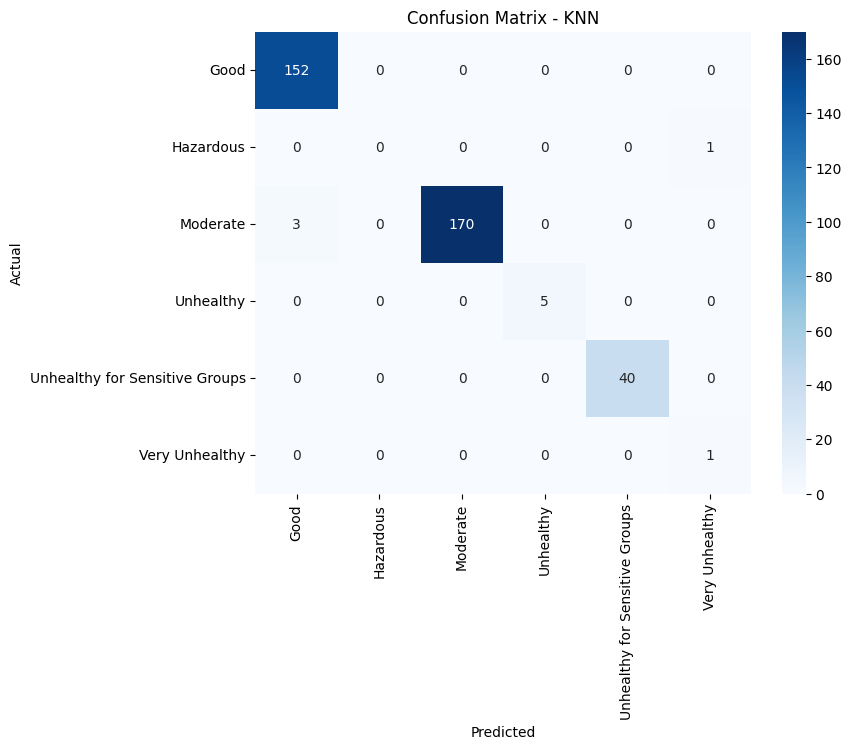


Evaluasi Model Naive Bayes:
                                precision    recall  f1-score   support

                          Good       1.00      0.99      1.00       152
                     Hazardous       0.00      0.00      0.00         1
                      Moderate       0.96      1.00      0.98       173
                     Unhealthy       1.00      0.60      0.75         5
Unhealthy for Sensitive Groups       1.00      0.82      0.90        40
                Very Unhealthy       0.25      1.00      0.40         1

                      accuracy                           0.97       372
                     macro avg       0.70      0.74      0.67       372
                  weighted avg       0.97      0.97      0.97       372

Akurasi Naive Bayes: 0.9704301075268817


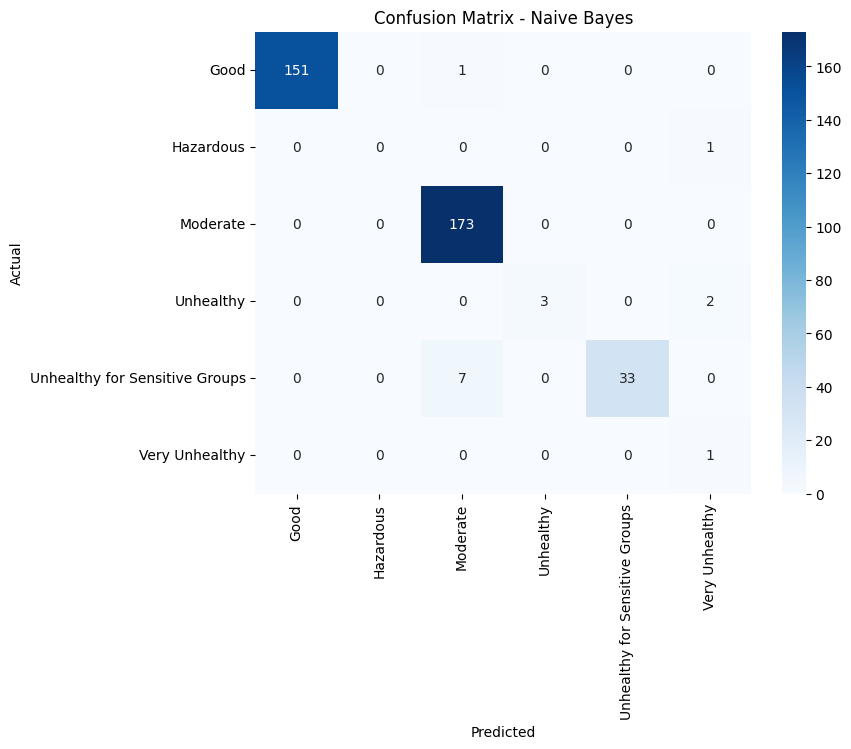

In [ ]:
knn_cm = confusion_matrix(y_test, y_pred_knn)
nb_cm = confusion_matrix(y_test, y_pred_nb)


def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

print("Evaluasi Model KNN:")
print(knn_report)
print("Akurasi KNN:", knn_accuracy)
plot_confusion_matrix(knn_cm, "Confusion Matrix - KNN")

print("\nEvaluasi Model Naive Bayes:")
print(nb_report)
print("Akurasi Naive Bayes:", nb_accuracy)
plot_confusion_matrix(nb_cm, "Confusion Matrix - Naive Bayes")

Membandingkan Performa Kedua Model

In [221]:
print("\nPerbandingan Performa:")
print(f"KNN Akurasi: {knn_accuracy * 100:.2f}%")
print(f"Naive Bayes Akurasi: {nb_accuracy * 100:.2f}%")


Perbandingan Performa:
KNN Akurasi: 98.92%
Naive Bayes Akurasi: 97.04%


Menampilkan Hasil Prediksi

In [222]:
data_sea['KNN_Predicted_Status'] = label_encoder.inverse_transform(knn_model.predict(data_sea[['AQI Value']]))
data_sea['NB_Predicted_Status'] = label_encoder.inverse_transform(nb_model.predict(data_sea[['AQI Value']]))


In [223]:
print("\nHasil Prediksi KNN dan Naive Bayes untuk tiap negara:")
print(data_sea[['Country', 'AQI Value', 'Status', 'KNN_Predicted_Status', 'NB_Predicted_Status']].head())



Hasil Prediksi KNN dan Naive Bayes untuk tiap negara:
      Country  AQI Value    Status KNN_Predicted_Status NB_Predicted_Status
18     Brunei         15      Good                 Good                Good
21   Cambodia         15      Good                 Good                Good
60  Indonesia         93  Moderate             Moderate            Moderate
75       Laos         20      Good                 Good                Good
85   Malaysia         70  Moderate             Moderate            Moderate


Visualisasi Distribusi Hasil Prediksi

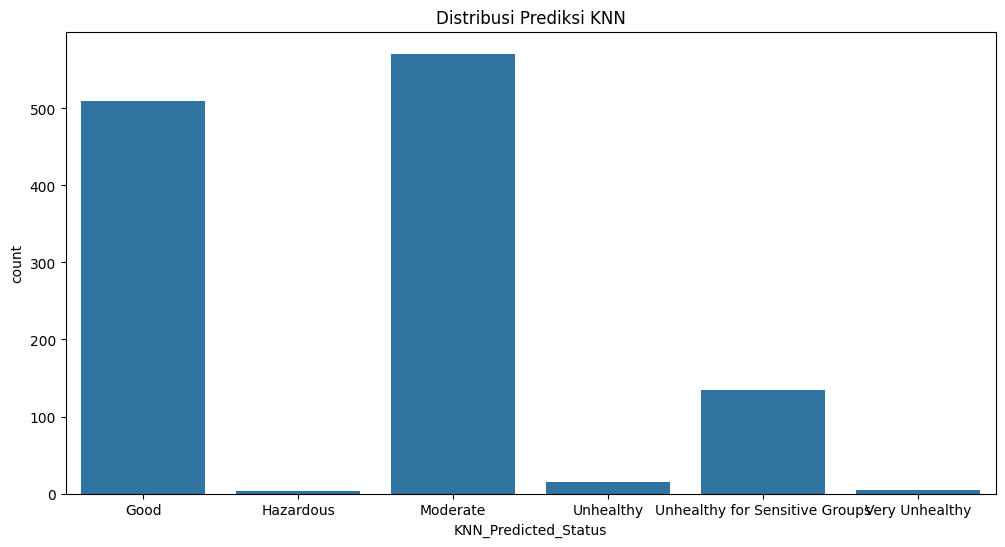

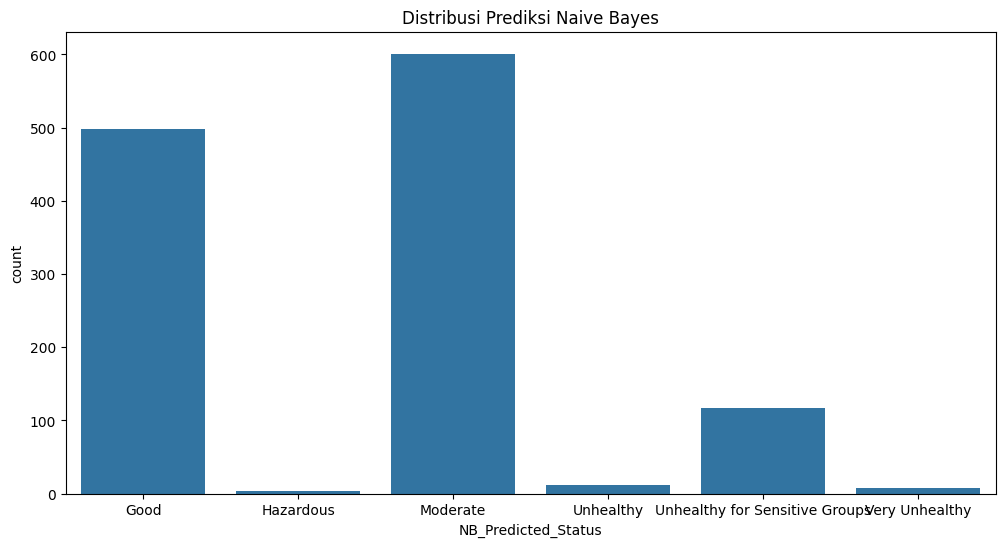

In [224]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_sea, x='KNN_Predicted_Status', order=label_encoder.classes_)
plt.title("Distribusi Prediksi KNN")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=data_sea, x='NB_Predicted_Status', order=label_encoder.classes_)
plt.title("Distribusi Prediksi Naive Bayes")
plt.show()
